In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
# Function to calculate word counts
def calculate_word_counts(dataset):
    return [len(tokens.split()) for tokens in dataset['tokens']]

In [6]:
# Load balanced datasets from CSV
balanced_train_dataset = pd.read_csv("/gdrive/MyDrive/robotics/balanced_train_dataset.csv")
balanced_val_dataset = pd.read_csv("/gdrive/MyDrive/robotics/balanced_val_dataset.csv")
balanced_test_dataset = pd.read_csv("/gdrive/MyDrive/robotics/balanced_test_dataset.csv")

# Calculate word counts for each dataset
word_counts_train = calculate_word_counts(balanced_train_dataset)
word_counts_val = calculate_word_counts(balanced_val_dataset)
word_counts_test = calculate_word_counts(balanced_test_dataset)

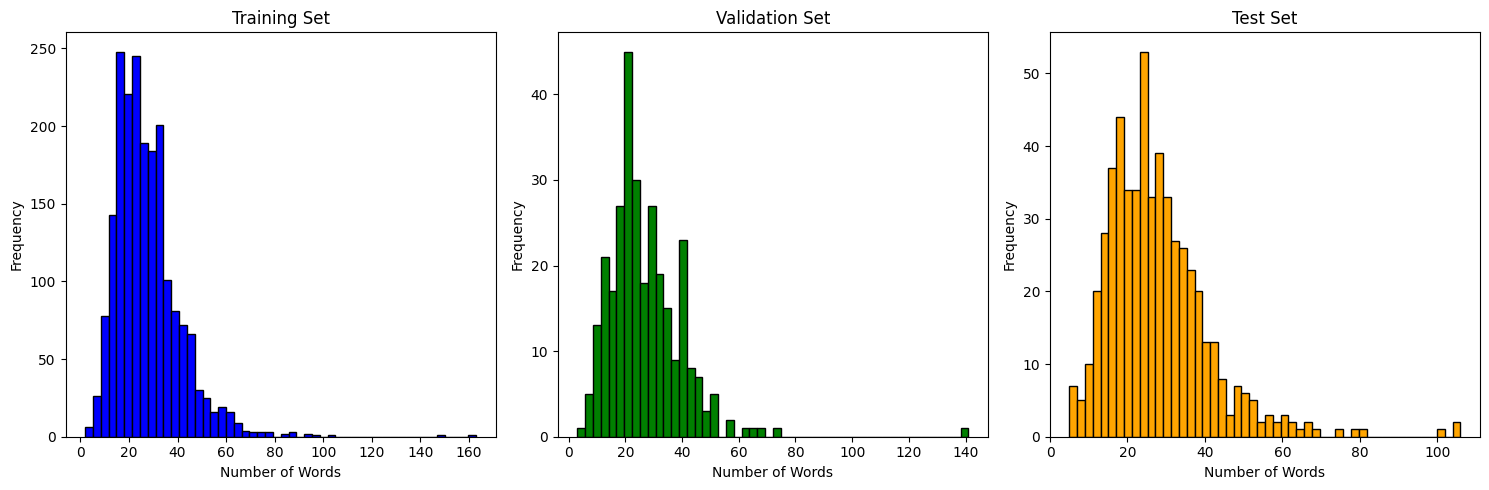

In [7]:
# Plot the histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(word_counts_train, bins=50, color='blue', edgecolor='black')
plt.title('Training Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(word_counts_val, bins=50, color='green', edgecolor='black')
plt.title('Validation Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(word_counts_test, bins=50, color='orange', edgecolor='black')
plt.title('Test Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
def find_word_count_threshold(word_counts, percentage):
    # Sort the word counts
    sorted_word_counts = sorted(word_counts)

    # Calculate the cumulative distribution function (CDF)
    cdf = np.cumsum(sorted_word_counts) / np.sum(sorted_word_counts)

    # Find the index where the CDF reaches or exceeds the desired percentage
    threshold_index = np.argmax(cdf >= percentage)

    # Get the word count threshold
    word_count_threshold = sorted_word_counts[threshold_index]

    return word_count_threshold


def calculate_mountain_names_count(dataset):
    return [sum(int(tag) for tag in str_tags.replace('[', '').replace(']', '').split(',')) for str_tags in dataset['ner_tags']]


In [15]:
threshold_train = find_word_count_threshold(word_counts_train, 0.95)
threshold_val = find_word_count_threshold(word_counts_val, 0.95)
threshold_test = find_word_count_threshold(word_counts_test, 0.95)

mountain_names_count_train = calculate_mountain_names_count(balanced_train_dataset)
mountain_names_count_val = calculate_mountain_names_count(balanced_val_dataset)
mountain_names_count_test = calculate_mountain_names_count(balanced_test_dataset)

# Print the results
print("Word count threshold covering 95% of rows in the training set:", threshold_train)
print("Word count threshold covering 95% of rows in the validation set:", threshold_val)
print("Word count threshold covering 95% of rows in the test set:", threshold_test)

Word count threshold covering 95% of rows in the training set: 63
Word count threshold covering 95% of rows in the validation set: 63
Word count threshold covering 95% of rows in the test set: 64


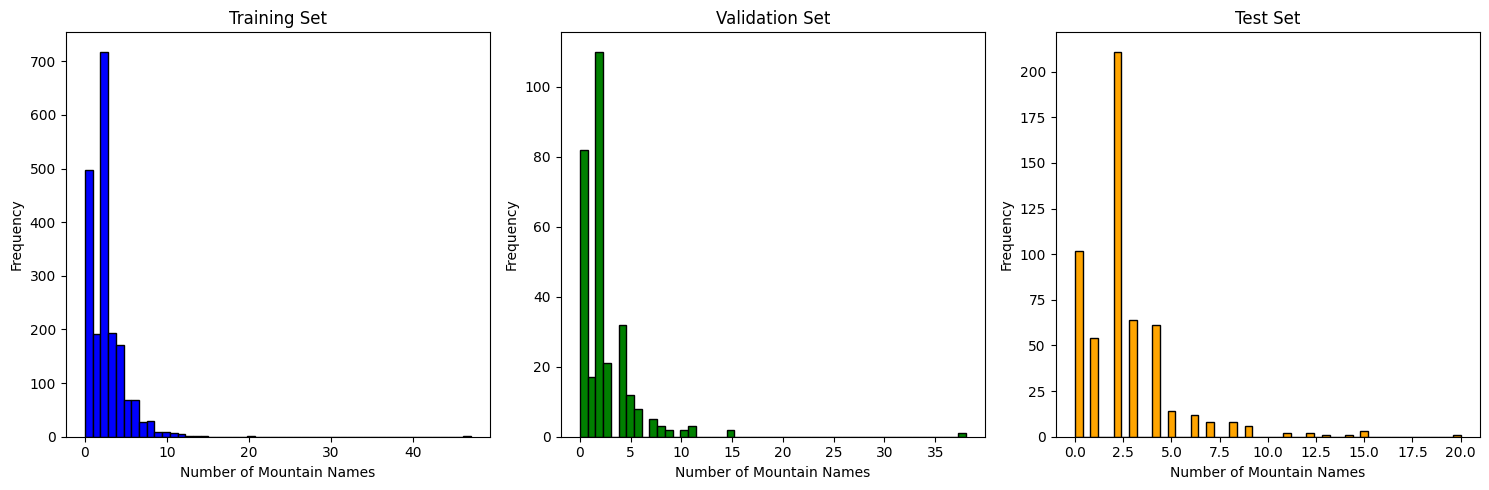

In [16]:
# Plot the histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(mountain_names_count_train, bins=50, color='blue', edgecolor='black')
plt.title('Training Set')
plt.xlabel('Number of Mountain Names')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mountain_names_count_val, bins=50, color='green', edgecolor='black')
plt.title('Validation Set')
plt.xlabel('Number of Mountain Names')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(mountain_names_count_test, bins=50, color='orange', edgecolor='black')
plt.title('Test Set')
plt.xlabel('Number of Mountain Names')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()